In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
data = pd.read_csv('Rainfall (1).csv',header=None)
data1 = pd.read_csv('Rainfall (1).csv')
data=data.drop(0)
for i in range(1,118):
  data[0][i]= data[0][i].replace(' ','').replace('&','0')
vectorizer = TfidfVectorizer()
vectorizer.fit(data[0])
print(vectorizer.vocabulary_)
# vector = vectorizer.transform(data['SUBDIVISION'])
# print(vector.shape)
# print(type(vector))
# print(vector.toarray())
for i in range(1,118):
  data[0][i]=int(vectorizer.vocabulary_[data[0][i].lower().strip()])

data.head()

{'kerala': 0}


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,0,1901,28.7,44.7,51.6,160,174.7,824.6,743,357.5,197.7,266.9,350.8,48.4,3248.6,YES
2,0,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205,315.8,491.6,358.4,158.3,121.5,3326.6,YES
3,0,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157,59,3271.2,YES
4,0,1904,23.7,3,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
5,0,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [59]:
data[15].replace(['YES','NO'],[1,0],inplace=True)
data.replace(['NA'],[0],inplace=True)

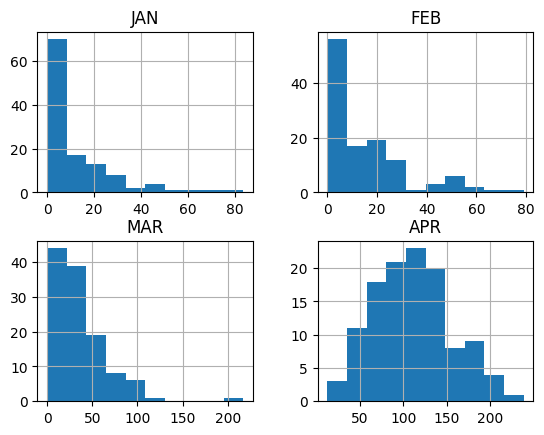

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
c = data1[['JAN','FEB','MAR','APR']]
# print(c)
c.hist()
plt.show()

In [37]:
x = data.iloc[:,1:14]
x.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1901,28.7,44.7,51.6,160,174.7,824.6,743,357.5,197.7,266.9,350.8,48.4
2,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205,315.8,491.6,358.4,158.3,121.5
3,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157,59
4,1904,23.7,3,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
5,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [38]:
y = data.iloc[:, -1]
y.head()

1    1
2    1
3    1
4    1
5    0
Name: 15, dtype: int64

In [39]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [40]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5,random_state=1)
model = model.fit(x_train,y_train)
model

RandomForestClassifier(max_depth=5, random_state=1)

In [42]:
y_pred = model.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:87.500000
recall score:100.000000
roc score:89.285714


In [44]:

input_data=(1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2)
# input_data=data[1]
input_data_as_numpy=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy.reshape(1,-1)
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(input_data_reshaped).transform(input_data_reshaped)
prediction=model.predict(input_data_reshaped)
print(prediction)

[0]
